# Food Image Classification for the course _Foundations of Deep Learning_.

Professors:
Paolo Napoletano
Marco Buzzelli

Tutor:
Mirko Agarla

[TODO]
- Introduce the problem you are trying to solve
- Show an analysis of the available data (EDA for images)
- Describe your solution
- Comment positive and negative results of your solution
(rely on quantitative and qualitative observations)
- Describe alternative (possibly failed) experiments

Dataset: \\
_Example Food Images_
- https://de.mathworks.com/help/deeplearning/ug/data-sets-for-deep-learning.html

The Example Food Images data set contains 978 photographs of food in nine classes (caesar_salad, caprese_salad, french_fries, greek_salad, hamburger, hot_dog, pizza, sashimi, and sushi).

References:
- https://github.com/TetsumichiUmada/food_app
  - https://github.com/TetsumichiUmada/food_app/blob/master/1_food_app.ipynb
  - https://github.com/Pyligent/food101-image-classification/blob/master/food-101_EDA_Model_RestNet_final.ipynb
  - https://github.com/TetsumichiUmada/food_app/blob/master/0_dataset.ipynb

- https://github.com/AhmedMaghawry/Food-Image-Recognition/blob/master/Food_Detection.ipynb
- FoodApp: http://blog.stratospark.com/creating-a-deep-learning-ios-app-with-keras-and-tensorflow.html
- https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8
- http://blog.stratospark.com/creating-a-deep-learning-ios-app-with-keras-and-tensorflow.html
- Rejection class: 
  - https://hal.archives-ouvertes.fr/hal-02963115/document
  - https://ai.stackexchange.com/questions/24914/image-classification-need-method-to-classify-unknown-objects-as-trash-3d

- CNN:
  - https://medium.com/free-code-camp/everything-you-need-to-know-to-master-convolutional-neural-networks-ef98ca3c7655

-None of the above class approach:
  - https://arxiv.org/pdf/1511.03719.pdf

- Cat/Dog dataset:
  - https://www.kaggle.com/competitions/dogs-vs-cats/data?select=train.zip
  - https://data-flair.training/blogs/cats-dogs-classification-deep-learning-project-beginners/

- Data augmentation:
  - https://medium.com/mlearning-ai/albumentations-a-python-library-for-advanced-image-augmentation-strategies-752bff3a3da0



Check the following notebook done during class:
- _FDL_E04.ipynb_

# 1. Data Set
In thi section we will describe the data at hand.



> ## Data management



In [67]:
!pip install split-folders # install the package to split the images in TRAIN and TEST folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
# IMPORT TENSORFLOW/KERAS/SCIKIT-LEARN
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# IMPORT OTHER MODULES
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from shutil import copyfile # to import "copyfile"
import splitfolders # needed to split the images in TRAIN and TEST folders

# CV2
import cv2
from google.colab.patches import cv2_imshow 

In [2]:
# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# # TRANSFER THE DATA FROM THE GOOGLE DRIVE FOLDER TO THE VIRTUAL MACHINE

# # The first path is the "data" folder on my Google Drive, and the second one is the destination in my current runtime
# # https://stackoverflow.com/questions/67360001/copy-files-from-a-mounted-google-drive-to-a-local-google-colab-session
# !cp -r /content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/Foundation_of_Deep_Learning/Project_Example_Food/ExampleFoodImageDataset /content/ExampleFoodImageDataset

In [71]:
# CONSTANT
SCALE_PERCENT = 6 # resizing percentage
SEED_VALUE = 42

# PATH TO THE DATA
ORIGINAL_DATA = "/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDataset"
PREPROCESSED_DATA = "/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/ExampleFoodImageDatasetPreprocessed"
DIR_TRAIN_TEST_DATA = '/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test' # path contenente i sottoinsiemi di train, test

In [ ]:
# # REMOVE ANY FOLDER NOT EMPTY IN GOOGLE DRIVE THAT YOU DO NOT NEED
# import shutil

# shutil.rmtree('/content/test')

# 2. Data Exploration
In this section the dataset will be explored.



> ## Exploratory Data Analysis (EDA)



In [61]:
# HOW MANY FOLDERS (CLASSES) DO WE HAVE? WHICH CLASSES DO WE HAVE?
lst = os.listdir(ORIGINAL_DATA) # your directory path
file_names = lst
number_files = len(file_names[1:])
print("Class names:", file_names[1:])
print("Number of classes: ", number_files)

Class names: ['french_fries', 'caprese_salad', 'pizza', 'greek_salad', 'sashimi', 'hot_dog', 'caesar_salad', 'hamburger', 'sushi', 'NotAC - None of the above class']
Number of classes:  10


In [62]:
# COUNT THE NUMBER OF ELEMENTS IN EACH CLASS FOLDERS

# FOLDER PATH
count = 0
hist_dict = {}

# ITERATE DIRECTORY
for path in os.listdir(ORIGINAL_DATA):
    # CHECK IF CURRENT PATH IS A FILE
    if os.path.isfile(os.path.join(ORIGINAL_DATA, path)):
      count += 0
    else:
      # IF IS NOT A FILE, IS A DIRECTORY. GET THE FOLDER NAME
      number_of_elements_per_folder = len([entry for entry in os.listdir(ORIGINAL_DATA + "/" + path)])
      print(f"The folder called {path} has a number of element(s) equal to:", number_of_elements_per_folder)
      count += 1
      hist_dict[path] = number_of_elements_per_folder

print()
print('Number of folders:', count, "different classes of food.")

The folder called french_fries has a number of element(s) equal to: 181
The folder called caprese_salad has a number of element(s) equal to: 15
The folder called pizza has a number of element(s) equal to: 299
The folder called greek_salad has a number of element(s) equal to: 24
The folder called sashimi has a number of element(s) equal to: 40
The folder called hot_dog has a number of element(s) equal to: 31
The folder called caesar_salad has a number of element(s) equal to: 27
The folder called hamburger has a number of element(s) equal to: 238
The folder called sushi has a number of element(s) equal to: 124
The folder called NotAC - None of the above class has a number of element(s) equal to: 76

Number of folders: 10 different classes of food.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

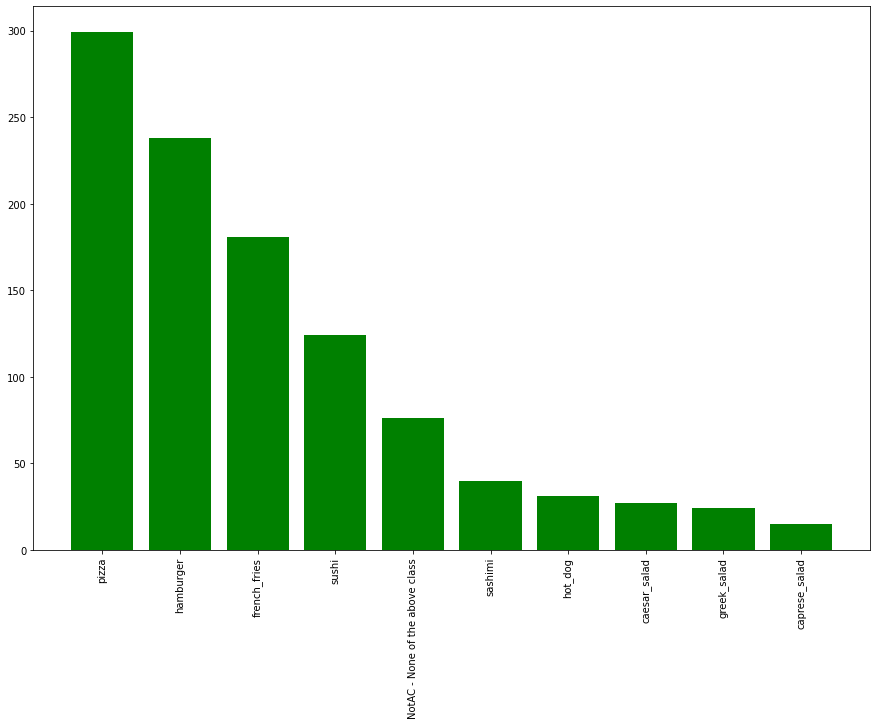

In [64]:
# SHOW THE DATASET DISTRIBUTION WITH A HISTOGRAM PLOT
plt.figure(figsize=(15, 10))
# CONVERT THE DICT TO DATAFRAME
new = pd.DataFrame([hist_dict]).transpose().reset_index()
new = new.rename(columns={"index": "food_name", 0: "value_count"})
# SORT THE DATAFRAME BASED ON VALUE_COUNT
new = new.sort_values("value_count", ascending=False)
new

plt.bar(new['food_name'], new['value_count'], color='g')
plt.xticks(rotation=90)

It is clear that this dataset shows an _unbalanced class problem_ that needs to be addressed through _data augmentation_.

## Show some images as example, their original sizes and the format

As it is visible from the image shape, they are of different sizes but all of them contain the full RGB color spectrum. In order to correctly treat them and feed them inside the CNN it is important that a preprocessing step of resizing them will be applied.



> ### DISPLAY SEVERAL IMAGES AT ONCE
Pick some of the images randomly from the dataset, and show them.


The image corresponding to french_fries has the shape of: (712, 846, 3)
The image corresponding to caprese_salad has the shape of: (1078, 808, 3)
The image corresponding to pizza has the shape of: (621, 1056, 3)
The image corresponding to greek_salad has the shape of: (756, 1008, 3)
The image corresponding to sashimi has the shape of: (106, 80, 3)
The image corresponding to hot_dog has the shape of: (788, 2302, 3)
The image corresponding to caesar_salad has the shape of: (808, 1078, 3)
The image corresponding to hamburger has the shape of: (712, 1072, 3)
The image corresponding to sushi has the shape of: (676, 676, 3)


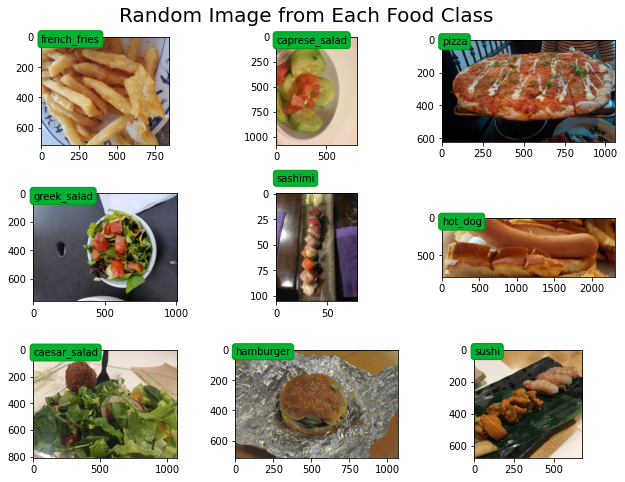

In [65]:
# DECIDE THE NUMBER OF IMAGES PER ROW AND COLUMN TO SHOW
rows = 3
cols = 3

# DEFINE SUBPLOTS BASED ON ROWS AND COLUMNS AND FIGSIZE
fig, ax = plt.subplots(rows, cols, figsize=(9, 7)) # fig = relative to the figure; ax = relative to the axes.
fig.suptitle('Random Image from Each Food Class', fontsize=20) # ADD A TITLE

# CREATE AN EMPTY LIST IN ORDER TO ADD ONLY THE DIRECTORY AND NOT THE FILES
food_dirs = []

# FOR EACH FILE IN ORIGINAL_DATA, CHECK IF IT IS A DIRECTORY AND, IF YES, ADD IT TO THE FOOD_DIRS FOLDER
for filename in os.listdir(ORIGINAL_DATA):
    if os.path.isdir(os.path.join(ORIGINAL_DATA,filename)):
        food_dirs.append(filename)

# PRINT THE FINAL LIST
# print(food_dirs)

# SHOW SOME RANDOM IMAGES FROM THE FOLDERS
for i in range(rows):
    for j in range(cols):
      food_dir = food_dirs[i*cols + j]
      all_files = os.listdir(os.path.join(ORIGINAL_DATA, food_dir))
      rand_img = np.random.choice(all_files)
      img = plt.imread(os.path.join(ORIGINAL_DATA, food_dir, rand_img))
      ax[i][j].imshow(img)
      
      # CREATE COLORS FOR THE BOX AROUND THE TEXT
      ec = (0, .6, .1)
      fc = (0, .7, .2)
      # CREATE THE TEXT ON TOP OF THE IMAGE
      ax[i][j].text(0, -20, food_dir, size=10, rotation=0, ha="left", va="top", 
              bbox=dict(boxstyle="round", ec=ec, fc=fc))
      print(f"The image corresponding to {food_dir} has the shape of:", img.shape)
        
# plt.setp(ax, xticks=[], yticks=[]) # do not show the ticks
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

As it is visible from the image shape, they are of different sizes but all of them contain the full RGB color spectrum. In order to correctly treat them and feed them inside the CNN it is important that a preprocessing step of resizing them will be applied.

# 3.DATA PREPROCESSING

## Resize all the images

In [10]:
# CREATE AN EMPTY LIST TO FILL WITH THE CATEGORIES
CATEGORIES = []

# LOOP THROUGH THE ROOT DIRECTORY, SELECT ONLY THE DIRECTORIES AND SAVE THEIR NAME
for filename in os.listdir(ORIGINAL_DATA):
    if os.path.isdir(os.path.join(ORIGINAL_DATA,filename)):
        CATEGORIES.append(filename)

# SHOW THE CATEGORY NAMES
CATEGORIES

['french_fries',
 'caprese_salad',
 'pizza',
 'greek_salad',
 'sashimi',
 'hot_dog',
 'caesar_salad',
 'hamburger',
 'sushi',
 'NotAC - None of the above class']

In [90]:
# RESIZE THE IMAGES AND SAVE THEM

for i in CATEGORIES:
    # print(f'CATEGORY: {i}')

    # CREATE A DIRECTORY FOR THE PROCESSED IMAGES
    try:
        os.mkdir(os.path.join(PREPROCESSED_DATA,i))
    except:
        print("Folder already found.")
        # pass

    path = os.path.join(ORIGINAL_DATA,i)
    
    for img in os.listdir(path):
      if img.endswith(('.png', '.jpg', '.jpeg')):
        img_raw = cv2.imread(os.path.join(ORIGINAL_DATA, i, img))
      else:
        continue

    # RESIZING
    width1 = int(img_raw.shape[1] * SCALE_PERCENT / 100)
    height1 = int(img_raw.shape[0] * SCALE_PERCENT / 100)
    dim1 = (width1, height1)
    img_resized = cv2.resize(img_raw, dim1, interpolation = cv2.INTER_AREA)

    # SAVING THE IMAGES
    cv2.imwrite(os.path.join(PREPROCESSED_DATA, i, f"{img}_RESIZED.jpg"), img_resized)

    # Save Image
    print('Saving the image...')

Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...
Folder already found.
Saving the image...


## Data Splitting

In [91]:
# CREATE A DIRECTORY FOR THE SPLITTING
try:
    os.mkdir(DIR_TRAIN_TEST_DATA)
except:
    print("Folder already found.")

Folder already found.


In [92]:
# SPLIT THE IMAGE IN TRAIN AND TEST SETS. 65% TRAIN DATA AND 35% TEST DATA.
splitfolders.ratio(PREPROCESSED_DATA,
                   output= DIR_TRAIN_TEST_DATA,
                   seed = SEED_VALUE,
                   ratio = (.65, .35)) # training, testing

Copying files: 1054 files [00:14, 72.14 files/s]


# 4. Data Augmentation on the train set

In this section we will apply different techniques in order to create additional images to be fed, later, into the model.
Why _Data Augmentation_? (INSERT DESCRIPTION)

In [94]:
# RENAME THE FOLDER VAL TO TEST IN GOOGLE DRIVE

old_name = r"/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/val"
new_name = r"/content/gdrive/MyDrive/Data_Science_2020-2022/Secondo_anno_Secondo_Semestre/FoDL_Project/Project_Example_Food/train_test/test"

try:
  os.rename(old_name, new_name)
except:
  print("Folder already renamed!")

In [101]:
# CHECK AGAIN THE NUMBER OF IMAGES FOR EACH CLASSES
# COUNT THE NUMBER OF ELEMENTS IN EACH CLASS FOLDERS

# FOLDER PATH
count_processed = 0
hist_dict_processed = {}

# ITERATE DIRECTORY
for path in os.listdir(DIR_TRAIN_TEST_DATA):
  if path == "train":

    print(path)
    for categories in os.listdir(os.path.join(DIR_TRAIN_TEST_DATA, path)):
      print("--", categories)

      for images in os.listdir(os.path.join(DIR_TRAIN_TEST_DATA, path, categories)):

        # CHECK IF CURRENT PATH IS A FILE
        if os.path.isfile(os.path.join(DIR_TRAIN_TEST_DATA, path, categories)):
          count_processed += 0
        else:
          # IF IS NOT A FILE, IS A DIRECTORY. GET THE FOLDER NAME
          number_of_elements_per_folder = len([entry for entry in os.listdir(DIR_TRAIN_TEST_DATA + "/" + path + "/" + categories)])
          # print(f"The folder called {path} has a number of element(s) equal to:", number_of_elements_per_folder)
          count_processed += 1
          hist_dict_processed[categories] = number_of_elements_per_folder
  else:
    break

print()
# print('Number of folders:', count_processed, "different classes of food.")

train
-- french_fries
-- caprese_salad
-- pizza
-- greek_salad
-- sashimi
-- hot_dog
-- caesar_salad
-- hamburger
-- sushi
-- NotAC - None of the above class



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

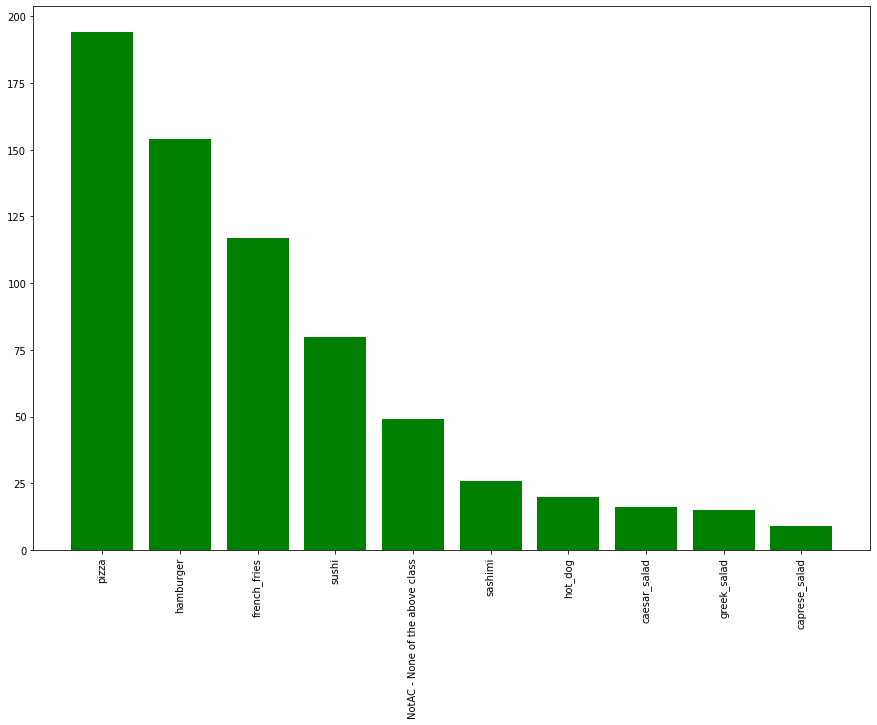

In [102]:
# SHOW THE DATASET DISTRIBUTION WITH A HISTOGRAM PLOT ONLY FOR THE TRAINING SET
plt.figure(figsize=(15, 10))
# CONVERT THE DICT TO DATAFRAME
new_processed = pd.DataFrame([hist_dict_processed]).transpose().reset_index()
new_processed = new_processed.rename(columns={"index": "food_name", 0: "value_count"})
# SORT THE DATAFRAME BASED ON VALUE_COUNT
new_processed = new_processed.sort_values("value_count", ascending=False)
new_processed

plt.bar(new_processed['food_name'], new_processed['value_count'], color='g')
plt.xticks(rotation=90)

It is still visible that the training set has imbalance classes, a problem that has to be faced before creating the Convolutional Neural Network model.

Check this out for data augmentation:
- https://towardsdatascience.com/complete-image-augmentation-in-opencv-31a6b02694f5

Prossimi passi:
- creare un for loop che vada a raccogliere tutte le immagini per ciascuna cartella
- se la numerosità delle immagini è < 200, allora applica trasformazioni, salva nuove immagini trasformate e se si raggiungono le 200 immagini, procedi con la cartella successiva.
- se tutto ciò funziona, cerca di creare almeno 500 immagini per ciascuna cartella (per ora potresti lasciare fuori la classe di rigetto!)



> ## Example of augmented images (show them)



# 5. Model Training
This section deals with the model creation, results and explanation.



> ## Data loader



In any deep learning framework, a data loader takes care of (at least) the following tasks:

- Loading input and target data
- Splitting the dataset into mini batches

In [ ]:
# base_path = 'catvsdog500/'

In [ ]:
# train_dataset = keras.preprocessing.image_dataset_from_directory(base_path,
#                                                             image_size=(224,224),
#                                                             color_mode='rgb',
#                                                             batch_size=32,
#                                                             label_mode='categorical',
#                                                             subset='training',
#                                                             validation_split = 0.2,
#                                                             shuffle=True,
#                                                             seed=1)

# 6. Evaluate and Test

# 7. Results Analysis

# 8. Future Work and Improvements

# References:

- https://medium.com/free-code-camp/everything-you-need-to-know-to-master-convolutional-neural-networks-ef98ca3c7655

- https://medium.com/mlearning-ai/computer-vision-exploring-your-image-datasets-the-right-way-538c5ae8ca5d

CNN EXPLAINED
- https://www.youtube.com/watch?v=pj9-rr1wDhM

CNN
- https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

DATA AUGMENTATION
- https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/#:~:text=Keras%20ImageDataGenerator%20is%20a%20gem,up%20on%20the%20overhead%20memory!
- https://www.analyticsvidhya.com/blog/2021/06/offline-data-augmentation-for-multiple-images/